In [2]:
# Importing Libraries

import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset
import seaborn as sns
from adjustText import adjust_text
import re
from matplotlib.ticker import FuncFormatter
import plotly.express as px

# Dataset Loading
car = pd.read_csv(r"C:\Users\DELL\Desktop\Regonet_project\automobile_dataset.csv")

car.sample(10, random_state=42)  # Displaying 10 random samples from the dataset

# make a copy of the dataset
car_1 = car.copy()

# Data Cleaning

# Removing extra space (including multiple internal spaces) from all string cells
for col in car_1.select_dtypes(include='object'):
    car_1[col] = car_1[col].map(lambda x: re.sub(r'\s+', ' ', x).strip() if isinstance(x,str) else x)

# Rename the columns to remove hyphens and replace them with underscores
car_1 = car_1.rename(columns={'highway-mpg': 'highway_mpg', 'city-mpg': 'city_mpg','peak-rpm': 'peak_rpm','compression-ratio': 'compression_ratio',
                      'fuel-system': 'fuel_system','engine-size': 'engine_size','num-of-cylinders': 'num_of_cylinders','engine-type': 'engine_type',
                      'curb-weight': 'curb_weight','wheel-base': 'wheel_base','engine-location': 'engine_location','drive-wheels': 'drive_wheels',
                      'body-style': 'body_style','num-of-doors': 'num_of_doors','fuel-type': 'fuel_type','normalized-losses': 'normalized_losses',})

# Convert numeric columns
numeric_cols = ['price', 'highway_mpg', 'city_mpg', 'peak_rpm', 'horsepower',
       'compression_ratio', 'stroke', 'bore', 'engine_size',
       'num_of_cylinders', 'curb_weight', 'height', 'width',
       'length', 'wheel_base', 'num-of-doors', 'normalized_losses',
       'symboling']

# dealing with missing values in the car dataset

car_1['price'] = car_1['price'].fillna(car_1['price'].median())                                              # Filling missing values in 'price' with the median value of the column
car_1['peak_rpm'] = car_1['peak_rpm'].fillna(car_1['peak_rpm'].median())                                     # Filling missing values in 'peak_rpm' with the median value of the column
car_1['horsepower'] = car_1['horsepower'].fillna(car_1['horsepower'].median())                               # Filling missing values in 'horsepower' with the median value of the column
car_1['stroke'] = car_1['stroke'].fillna(car_1['stroke'].median())                                           # Filling missing values in 'stroke' with the median value of the column
car_1['bore'] = car_1['bore'].fillna(car_1['bore'].median())                                                 # Filling missing values in 'bore' with the median value of the column
car_1['num_of_doors'] = car_1['num_of_doors'].fillna(car_1['num_of_doors'].mode())                           # Filling missing values in 'num_of_doors' with the mode value of the column
car_1['normalized_losses'] = car_1['normalized_losses'].fillna(car_1['normalized_losses'].median())          # Filling missing values in 'normalized_losses' with the median value of the column

# Car Price by Fuel Type

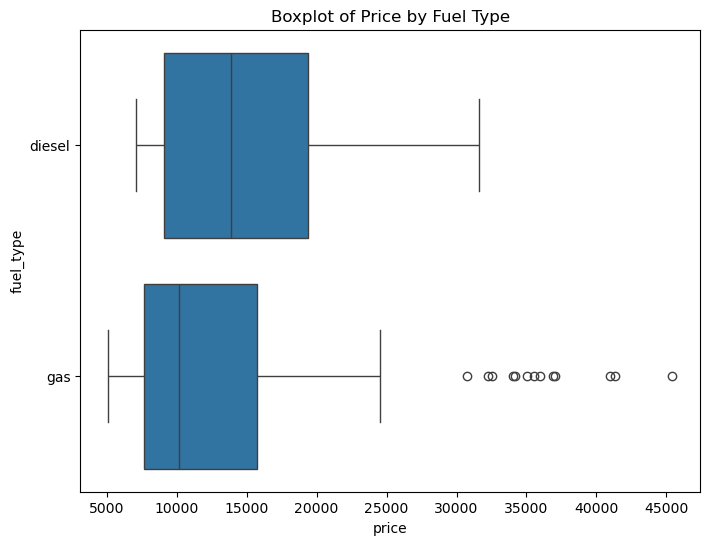

In [3]:
fuel_type_order = car_1.groupby('fuel_type')['price'].median().sort_values(ascending=False).index
# 5. Boxplot of Price by Fuel Type
plt.figure(figsize=(8, 6))
sns.boxplot(x='price', y='fuel_type', data=car_1, vert=False, order=fuel_type_order)
plt.title("Boxplot of Price by Fuel Type")
plt.show()